# Integração numérica: regras de Newton-Cotes

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy as sp
from scipy import integrate

In [2]:
## Implementações de Newton-Cotes: regra do trapézio e 1/3 Simpson generalizadas

In [3]:
''' Newton-Cotes: Regra do Trapezio
    assume Y igualmente espaçado e 
    com pelo menos 2 pontos 
'''
def integral_trapezio(h,Y):
    val = 0.0
    for i in range(1,Y.size-1):
        val += 2*Y[i]
    val = 0.5*h*( val + Y[0] + Y[-1] )
    return val

''' Newton-Cotes: Regra 1/3 de Simpson
    assume Y igualmente espaçado e 
    com pelo menos 3 pontos 
'''
def integral_onethird_simpson(h,Y):
    val = 0.0
    for i in range(1,Y.size-1,2):
        val += 4*Y[i]
    
    for i in range(2,Y.size-2,2):
        val += 2*Y[i]        
    
    val = h/3.0*( val + Y[0] + Y[-1] )
    return val

''' HELPER''' 
def print_metodo(flag):            
    print('*** Método de integração: ' + str.upper(flag) + ' ***')

# limites de integração
a = 0
b = 93

# integrando 
f = lambda v: 97000*v/(5*v**2 + 570000)

# pontos de integração (ímpares para testar com 1/3 simpson)
npi = [11,101,1001,10001,100001]

# integral exata
x = sy.Symbol('x')
vex = sy.integrate(f(x),(x,a,b))
print('Ingegral exata (simbólica): ' + str(vex))
vex = float(vex)
print('Integral exata (numérica): ' + str(vex))

metodos = ['trapezio','13simpson']
no = False

# integração numérica
for metodo in metodos:
    I = []
    EREL = []
    for n in npi:
        v = np.linspace(a,b,num=n,endpoint=True)
        fv = f(v)
        h = (b-a)/n    
                
        if metodo == 'trapezio':
            if no == False:
                print_metodo(metodo)
                no = True            
            val = integral_trapezio(h,fv)
            erel = abs((vex - val)/vex)*100
            I.append(val)
            EREL.append(erel)
            print("no. de pontos de integração = {0:d} \t I = {1:.10f} \t EREL = {2:.10f}%".format(n,val,erel) )

        elif metodo == '13simpson':
            if no == False:
                print_metodo(metodo)
                no = True
            val = integral_onethird_simpson(h,fv)
            erel = abs((vex - val)/vex)*100
            I.append(val)
            EREL.append(erel)        
            print("no. de pontos de integração = {0:d} \t I = {1:.10f} \t EREL = {2:.10f}%".format(n,val,erel) )
    
    no = False


Ingegral exata (simbólica): -9700*log(114000) + 9700*log(122649)
Integral exata (numérica): 709.3432392521672
*** Método de integração: TRAPEZIO ***
no. de pontos de integração = 11 	 I = 644.6326388025 	 EREL = 9.1226076276%
no. de pontos de integração = 101 	 I = 702.3175905243 	 EREL = 0.9904441657%
no. de pontos de integração = 1001 	 I = 708.6345799441 	 EREL = 0.0999035825%
no. de pontos de integração = 10001 	 I = 709.2723117737 	 EREL = 0.0099990350%
no. de pontos de integração = 100001 	 I = 709.3361458882 	 EREL = 0.0009999903%
*** Método de integração: 13SIMPSON ***
no. de pontos de integração = 11 	 I = 644.8576901994 	 EREL = 9.0908809000%
no. de pontos de integração = 101 	 I = 702.3200388852 	 EREL = 0.9900990068%
no. de pontos de integração = 1001 	 I = 708.6346046475 	 EREL = 0.0999000999%
no. de pontos de integração = 10001 	 I = 709.2723120210 	 EREL = 0.0099990001%
no. de pontos de integração = 100001 	 I = 709.3361458907 	 EREL = 0.0009999900%


### Tarefa
Implemente uma função para realizar a integração numérica pela regra 3/8 de Simpson, use-a para calcular o valor de 

$$\int_{a=3}^{b=93} \frac{97000*v}{(5*v**2 + 570000)} \, dx$$ 

e compare o resultado com os obtidos pelas anteriores.

## Integração simbólica 

Vamos ver alguns exemplos de integração simbólica. Para termos uma impressão mais elegante de expressões, antes usamos a seguinte instrução:

In [4]:
sy.init_printing()

### Regra quadratura de Simpson

Vamos usar símbolos para chegar à expressão da regra de quadratura de Simpson.

In [5]:
a,b,X = sy.symbols("a, b, x")
f = sy.Function("f")

Definimos tuplas para os pontos de amostra e pesos.

In [6]:
x = a, (a + b)/2, b # ponto médio 
w = [sy.symbols("w_%d" % i) for i in range(len(x))] # pesos 

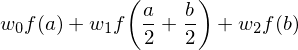

In [7]:
q = sum([w[i] * f(x[i]) for i in range(len(x))])
q

Para calcular valores aproximados dos pesos $w_i$, escolhemos a base polinomial 

$$\{ \phi_n(x) = x^n \}_{n=0}^2$$

para a interpolação de $f(x)$ e um objeto simbólico para representar cada uma dessas funções.

In [8]:
phi = [sy.Lambda(X, X**n) for n in range(len(x))]
phi

Agora temos que descobrir os valores dos pesos. A integral $\int_a^b \phi_n(x) \, dx$ pode ser calculada analiticamente para cada função de base. Isto nos ajuda a resolver o seguinte sistema:

$$\sum\limits_{i=0}^2 w_i \phi_n(x_i) = \int_a^b \phi_n(x) \, dx$$

O sistema pode ser construído no `sympy` da seguinte forma: 

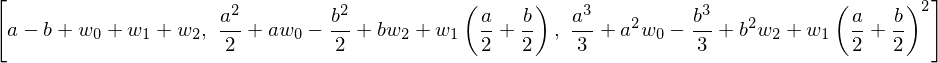

In [9]:
eqs = [q.subs(f, phi[n]) - sy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]
eqs

Em seguida, resolvemos o sistema para obter as expressões analíticas para os pesos:  

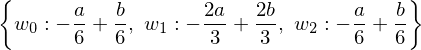

In [10]:
w_sol = sy.solve(eqs,w)
w_sol

Substituindo a solução na expressão simbólica para a regra de quadratura:

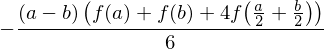

In [11]:
q.subs(w_sol).simplify()

Podemos verificar no material que esta é, de fato, a expressão para a regra de quadratura de Simpson.

## Integração múltipla

A integração em 2 ou mais variáveis pode ser feita usando as funções `dblquad`, `tplquad` e `nquad`, onde o número de funções e de limites de integração deve se adequar ao tipo de integral.

Abaixo, temos alguns exemplos: 

#### Integração dupla

Neste exemplo, integramos 
$$\int_0^1\int_0^1 e^{-x^2 - y^2} \, dx dy$$

In [12]:
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

#### Integração tripla

Neste exemplo, integramos 
$$\int_0^1\int_0^1\int_0^1 e^{-x^2 - y^2 - z^2} \, dx dy dz$$

In [13]:
def f(x, y, z): 
    return np.exp(-x**2-y**2-z**2) 

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1
q, r = lambda x, y: 0, lambda x, y: 1
integrate.tplquad(f, 0, 1, g, h, q, r) 

In [14]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling();